## Automaded Dialogue Games

### Authors: Stefan Sarkadi and Ionut Moraru
#### AAAI2020

Two agents, Deceiver (DEC), and an Interrogator (INT) take part in a dialogue game based on a World Graph (WG). Both agents have a knowledge base (KB) and a Theory of Mind of each other (ToM). The goal of DEC $G_{Dec}$ is to make INT infer the wrong color of the nodes that make up the WG.

The social parameters that influence the interaction between the two agents are the following:

1) Trust

2) Cognitive Load

3) Communicative skill (Cognitive resources)

4) Rewards for both agents + rewards calculated by the game

The actions that INT can perform are accept/reject argument provided by DEC, ask DEC about colour of a node.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import count

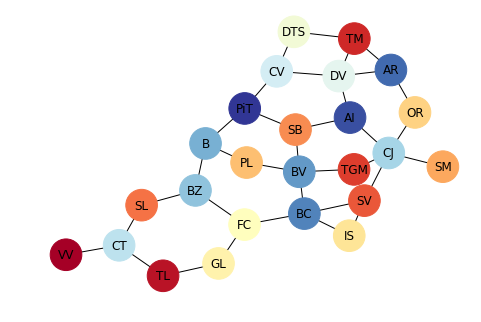

In [68]:
#graph1
df1 = pd.DataFrame({ 'from':['A', 'A', 'A', 'B', 'B', 'C', 'D', 'D', 'E', 'F', 'F', 'F', 'G'],
                       'to':['B', 'C', 'D', 'E', 'F', 'F', 'F', 'G', 'H', 'H', 'I', 'J', 'J']})
carac1 = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E','F','G','H','I','J'], 
                       'myvalue':['group1','group2','group3','group4','group3',
                                  'group4','group2','group4','group3','group2'] })

transitionSystem = [()]

#graph 2
df2 = pd.DataFrame({ 'from':['A', 'B', 'C','D','D','D','E','F','G','H'], 
                       'to':['D', 'D', 'D','E','F','G','H','H','H','I']})
carac2 = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E','F','G','H','I'], 'myvalue':['group2','group3','group4', 'group1', 'group2','group3','group4', 'group1', 'group5' ] })

#graph3 NN Style
df3 = pd.DataFrame({ 'from':['A', 'B', 'C','D','E','F','G','H','I','J','K','L'], 
                       'to':['J', 'J', 'J','K','K','K','L','L','L','M','M','M']})
carac3 = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E','F','G','H','I','J','K','L','M'], 'myvalue':['group1','group2','group3','group1','group2','group3','group1','group2','group3','group1','group2','group3','group5'] })

df4 = pd.DataFrame({ 'from':['J', 'J', 'J','K','K','K','L','L','L','M','M','M'],
                       'to':['A', 'B', 'C','D','E','F','G','H','I','J','K','L']})

# graph for romania map
rom = pd.DataFrame({
    'from':['TM' ,'TM','TM','AR','AR','OR','DTS','DV','DV','CJ','CJ','CJ' ,'CJ','AI','CV' ,'SB' ,'SB','TGM','PiT','BV','BV','PL','SV','SV','IS','BC','FC','FC','BZ','BZ','GL','TL','CT','CT'],
      'to':['DTS','AR','DV','OR','DV','CJ', 'CV','CV','AI','SM','SV','TGM','AI','SB','PiT','PiT','BV','BV' ,  'B','BC','PL', 'B','IS','BC','BC','FC','BZ','GL', 'B','SL','TL','CT','SL','VV']
})
city = pd.DataFrame({
    'ID'  :['TM'       ,'AR'  ,'OR'    ,'CJ'  ,'SM'      ,'DV'  ,'DTS'    ,'CV'     ,'Pit'    ,'AI'       ,'SB'   ,'TGM'       ,'BV'    ,'SV'     ,'IS'  ,'BC'   ,'B'        ,'PL'      ,'FC'     ,'BZ'   ,'GL'    ,'TL'    ,'CT'       ,'VV'       ,'SL'      ]                                                   ,
    'name':['Timisoara','Arad','Oradea','Cluj','SatuMare','Deva','Drobeta','Craiova','Pitesti','AlbaIulia','Sibiu','TarguMures','Brasov','Suceava','Iasi','Bacau','Bucuresti','Ploiesti','Focsani','Buzau','Galati','Tulcea','Constanta','VamaVeche','Slobozia']
})


x = makeAndPlotGraph(rom, city)

In [67]:
# method that draws a graph and then returns the graph and the characs.

def makeAndPlotGraph(df, carac):
    G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
    G.nodes()
    carac= carac.set_index('ID')
    carac=carac.reindex(G.nodes())
    carac['name']=pd.Categorical(carac['name'])
    carac['name'].cat.codes
#     nx.draw(G, with_labels=True, node_color=carac['name'].cat.codes, cmap=plt.cm.Set3, node_size=500)
    nx.draw_kamada_kawai(G, with_labels=True,node_color=carac['name'].cat.codes,cmap=plt.cm.RdYlBu_r, node_size=1000)
    return [G, carac]

In [69]:
RoTS ={'TM':'AR',
       'TM':'DTS',
       'TM':'DV',
       'DV':'TM',
       'DV':'CV',
       'DV':'AR',
       'DV':'AI',
       'AR':'DV',
       'AR':'OR',
       'AR':'TM',
       'DTS':'TM',
       'DTS':'CV',
       'CV':'DTS',
       'CV':'DV',
       'CV':'PiT',
       'OR':'AR',
       'OR':'CJ',
       'AI':'DV',
       'AI':'CJ',
       'AI':'SB',
       'SB':'AI',
       'SB':'PiT',
       'SB':'BV',
       'CJ':'AI',
       'CJ':'OR',
       'CJ': 'SM',
       'CJ':'SV',
       'CJ':'TGM',
       'SM':'CJ',
       'PiT':'CV',
       'PiT':'SB',
       'PiT':'B',
       'TGM':'CJ',
       'TGM':'BV',
       'BV':'TGM',
       'BV':'SB',
       'BV':'BC',
       'BV':'PL',
       'PL':'BV',
       'PL':'B',
       'B':'PiT', #DN1 aka DeneUNU
       'B':'PL',
       'B':'BZ',
       'BZ':'SL',
       'BZ':'FC',
       'BZ':'B',
       'FC':'BZ',
       'FC':'GL',
       'FC':'BC',
       'BC':'FC',
       'BC':'BV',
       'BC':'IS',
       'BC':'SV',
       'SV':'BC',
       'SV':'CJ',
       'SV':'IS',
       'IS':'SV',
       'IS':'BC',
       'GL':'FC',
       'GL':'TL',
       'SL':'BZ',
       'SL':'CT',
       'TL':'GL',
       'TL':'CT',
       'CT':'SL',
       'CT':'TL',
       'CT': 'VV',
       'VV':'CT'
      }